<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/algoTrading/code/Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!git clone https://github.com/TA-Lib/ta-lib-python.git

fatal: destination path 'ta-lib-python' already exists and is not an empty directory.


In [47]:
!python /content/ta-lib-python/setup.py

/content/ta-lib-python/setup.py:75: UserWarning: Cannot find ta-lib library, installation may fail.
  warnings.warn('Cannot find ta-lib library, installation may fail.')
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: no commands supplied


In [48]:
!pip install numpy cython --quiet
!pip install yfinance --quiet

In [49]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4091    0  4091    0     0  11103      0 --:--:-- --:--:-- --:--:-- 11086
100  517k  100  517k    0     0   371k      0  0:00:01  0:00:01 --:--:-- 1060k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4127    0  4127    0     0   9042      0 --:--:-- --:--:-- --:--:--  9050
100  392k  100  392k    0     0   371k      0  0:00:01  0:00:01 --:--:--  890k


In [50]:
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
import datetime

#Ticker is the stock that we want to get
Ticker = "SBIN.NS"

# Get Sample data based on a Ticker
end1 = datetime.date.today()
start1 = end1 - pd.Timedelta(days=365)

df = yf.download(Ticker, start=start1, end=end1, interval="1d" )

df = df.dropna()

[*********************100%%**********************]  1 of 1 completed


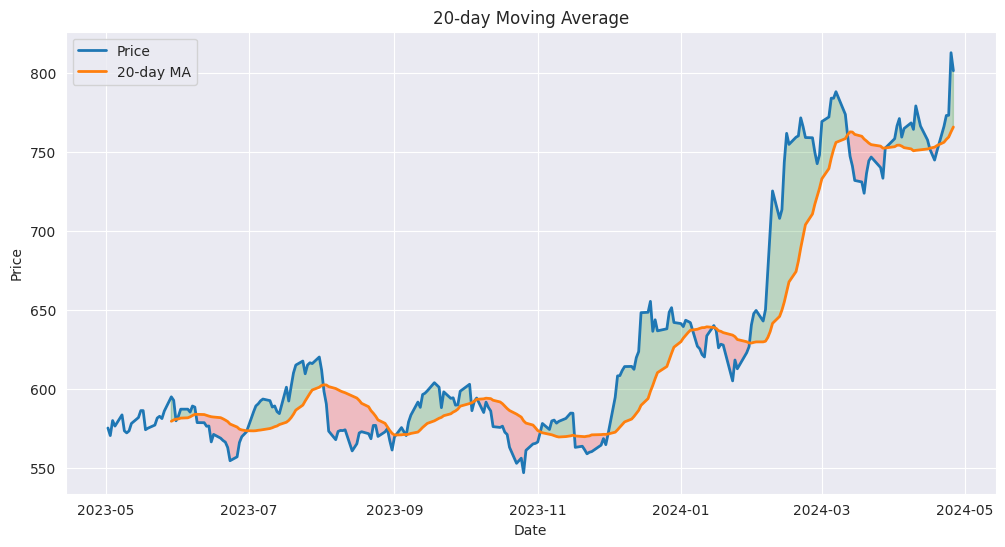

In [52]:
# Calculate 20-day Moving Average
ma_20 = df['Close'].rolling(window=20).mean()
ma_50 = df['Close'].rolling(window=50).mean()
ma_200 = df['Close'].rolling(window=200).mean()

# Plot the Moving Average and Price
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index, df['Close'], label='Price', linewidth=2)
ax.plot(ma_20.index, ma_20, label='20-day MA', linewidth=2)
ax.fill_between(df.index, df['Close'], ma_20, where=df['Close'] >= ma_20, interpolate=True, alpha=0.2, facecolor='green', edgecolor='green')
ax.fill_between(df.index, df['Close'], ma_20, where=df['Close'] < ma_20, interpolate=True, alpha=0.2, facecolor='red', edgecolor='red')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('20-day Moving Average')
plt.show()

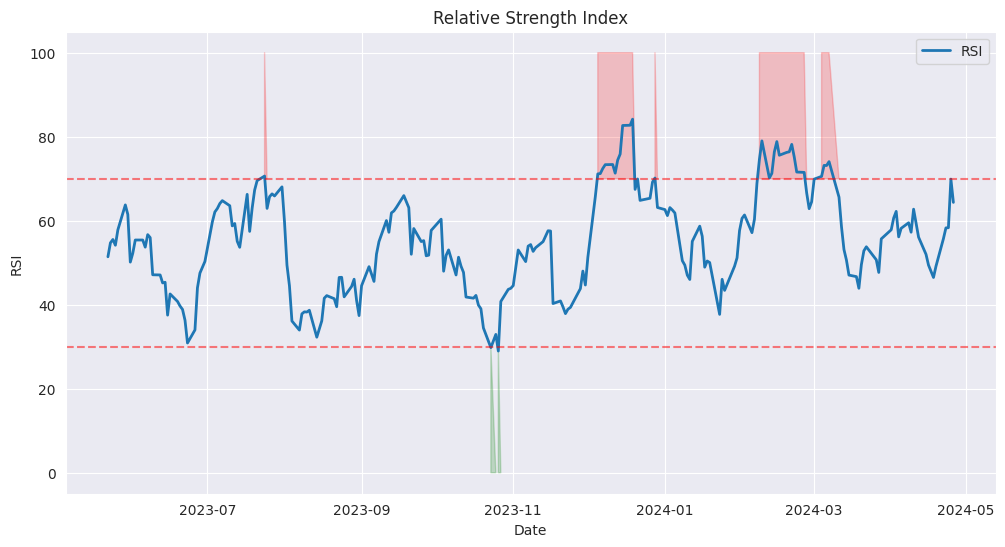

In [53]:
# Calculate RSI
rsi = ta.RSI(df['Close'], timeperiod=14)

# Plot RSI
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index, rsi, label='RSI', linewidth=2)
ax.axhline(y=30, color='red', linestyle='--', alpha=0.5)
ax.axhline(y=70, color='red', linestyle='--', alpha=0.5)
ax.fill_between(df.index, y1=0, y2=30, where=(rsi <= 30), interpolate=True, alpha=0.2, facecolor='green', edgecolor='green')
ax.fill_between(df.index, y1=70, y2=100, where=(rsi >= 70), interpolate=True, alpha=0.2, facecolor='red', edgecolor='red')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.set_title('Relative Strength Index')
plt.show()

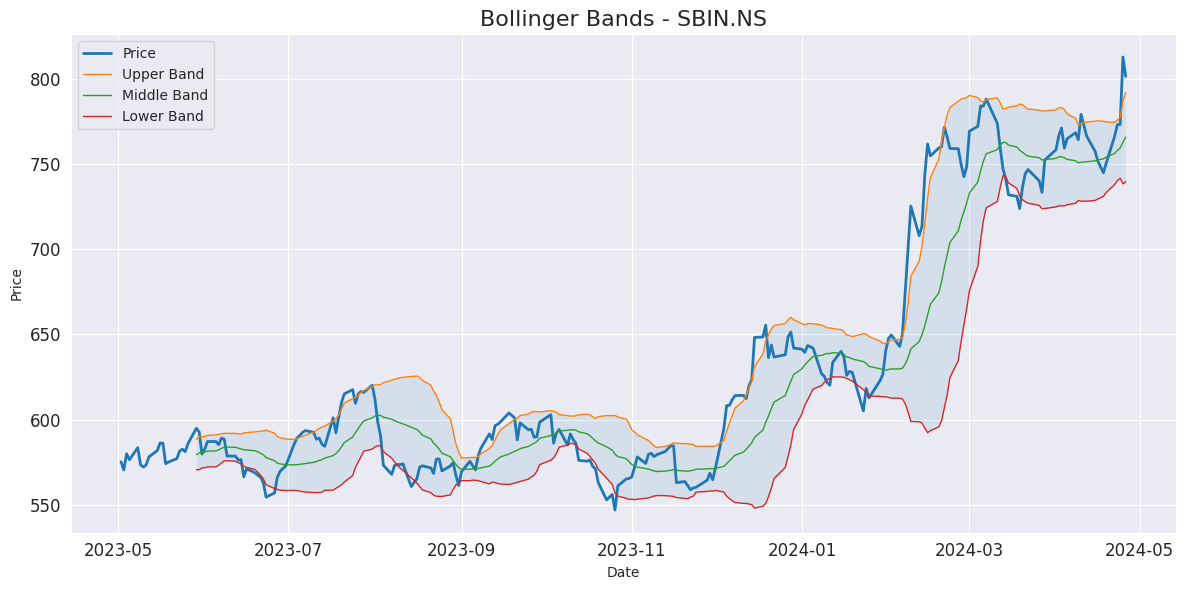

In [54]:
# Calculate Bollinger Bands
upper, middle, lower = ta.BBANDS(df['Close'], timeperiod=20, nbdevup=1.5, nbdevdn=1.5)

# Plot Bollinger Bands and Price
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index, df['Close'], label='Price', linewidth=2)
ax.plot(upper.index, upper, label='Upper Band', linewidth=1)
ax.plot(middle.index, middle, label='Middle Band', linewidth=1)
ax.plot(lower.index, lower, label='Lower Band', linewidth=1)
ax.fill_between(df.index, lower, upper, alpha=0.1)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Bollinger Bands - {}'.format(Ticker.upper()), fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

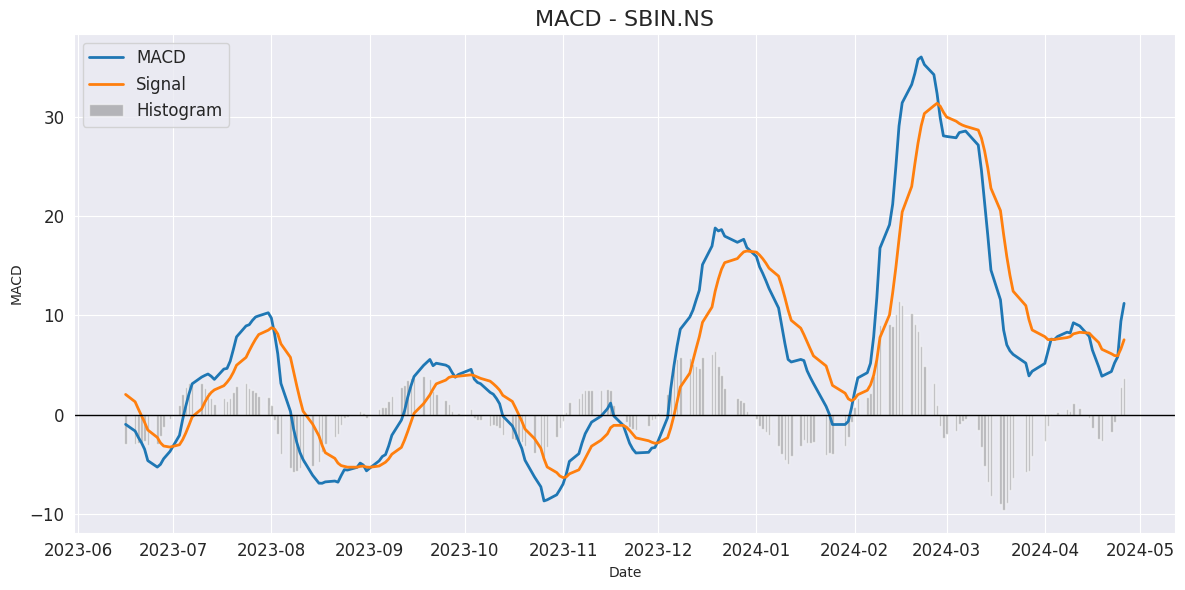

In [55]:
# Calculate MACD
macd, signal, hist = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Plot MACD
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index, macd, label='MACD', linewidth=2)
ax.plot(df.index, signal, label='Signal', linewidth=2)
ax.bar(df.index, hist, label='Histogram', color='gray', alpha=0.5)
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.legend(loc='upper left', fontsize=12)
ax.set_xlabel('Date')
ax.set_ylabel('MACD')
ax.set_title('MACD - {}'.format(Ticker.upper()), fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

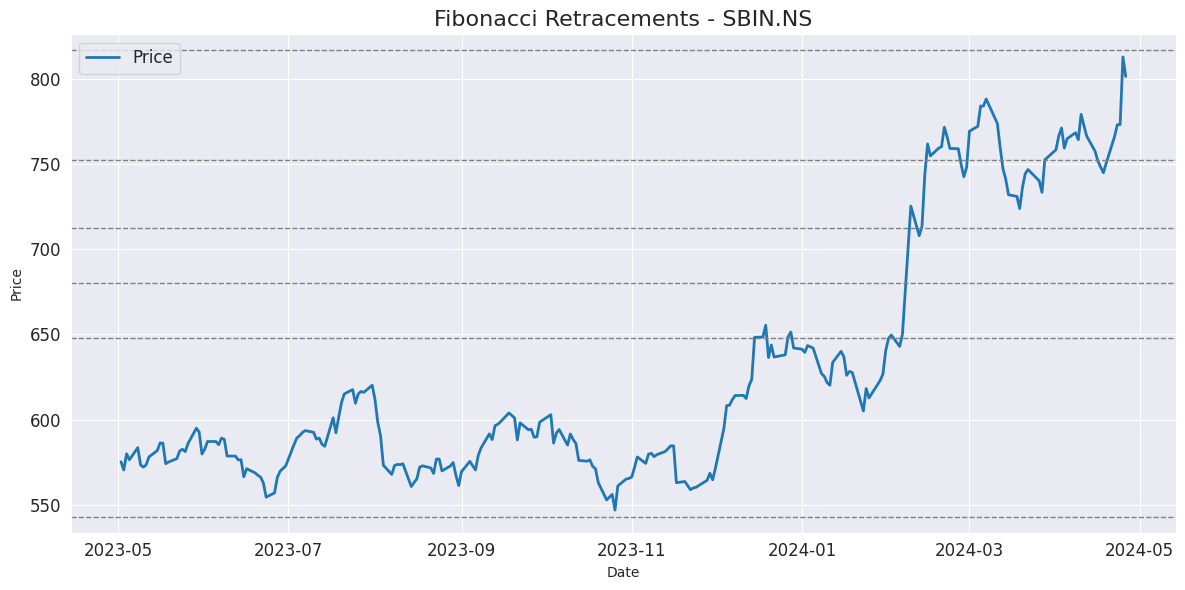

In [56]:
# Calculate Fibonacci retracements
high = df['High'].max()
low = df['Low'].min()
levels = [0, 0.236, 0.382, 0.5, 0.618, 1]
diff = high - low
fib_levels = [high - (diff * level) for level in levels]

# Plot Fibonacci retracements and Price
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index, df['Close'], label='Price', linewidth=2)
for level in fib_levels:
    ax.axhline(y=level, linestyle='--', color='gray', linewidth=1)
ax.legend(loc='upper left', fontsize=12)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Fibonacci Retracements - {}'.format(Ticker.upper()), fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

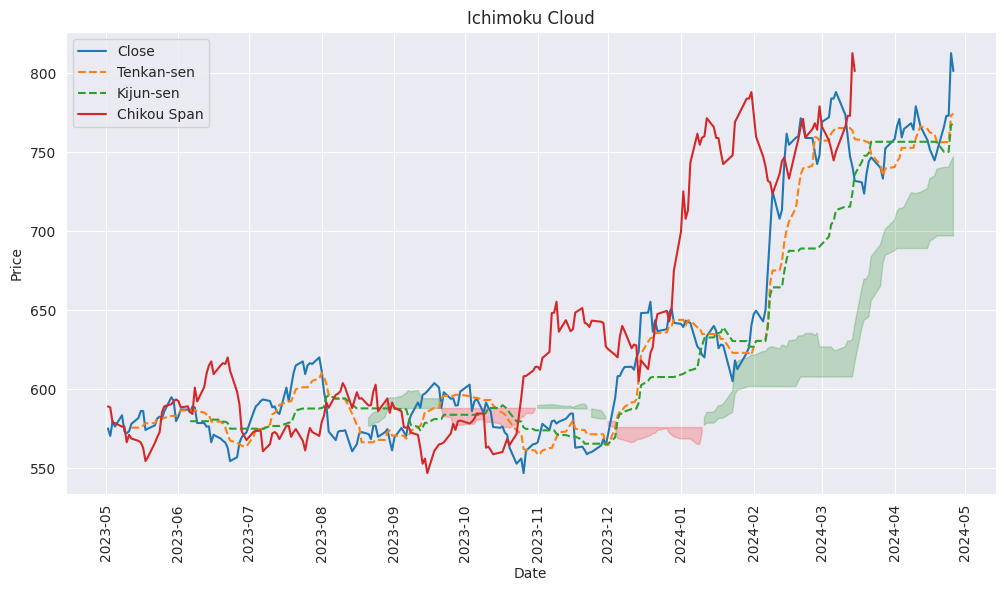

In [57]:
import matplotlib.dates as mdates

# Calculate Ichimoku Cloud
high_prices = df['High']
low_prices = df['Low']
close_prices = df['Close']
high_9 = high_prices.rolling(window=9).max()
low_9 = low_prices.rolling(window=9).min()
tenkan_sen = (high_9 + low_9) / 2
high_26 = high_prices.rolling(window=26).max()
low_26 = low_prices.rolling(window=26).min()
kijun_sen = (high_26 + low_26) / 2
senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)
high_52 = high_prices.rolling(window=52).max()
low_52 = low_prices.rolling(window=52).min()
senkou_span_b = ((high_52 + low_52) / 2).shift(26)
chikou_span = close_prices.shift(-26)

# Plot Ichimoku Cloud
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(close_prices.index, close_prices, label='Close')
ax.plot(tenkan_sen.index, tenkan_sen, label='Tenkan-sen', linestyle='--')
ax.plot(kijun_sen.index, kijun_sen, label='Kijun-sen', linestyle='--')
ax.fill_between(senkou_span_a.index, senkou_span_a, senkou_span_b, where=senkou_span_a >= senkou_span_b, color='green', alpha=0.2)
ax.fill_between(senkou_span_a.index, senkou_span_a, senkou_span_b, where=senkou_span_a < senkou_span_b, color='red', alpha=0.2)
ax.plot(chikou_span.index, chikou_span, label='Chikou Span')
ax.legend()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.tick_params(axis='x', rotation=90)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.title('Ichimoku Cloud')

plt.show()


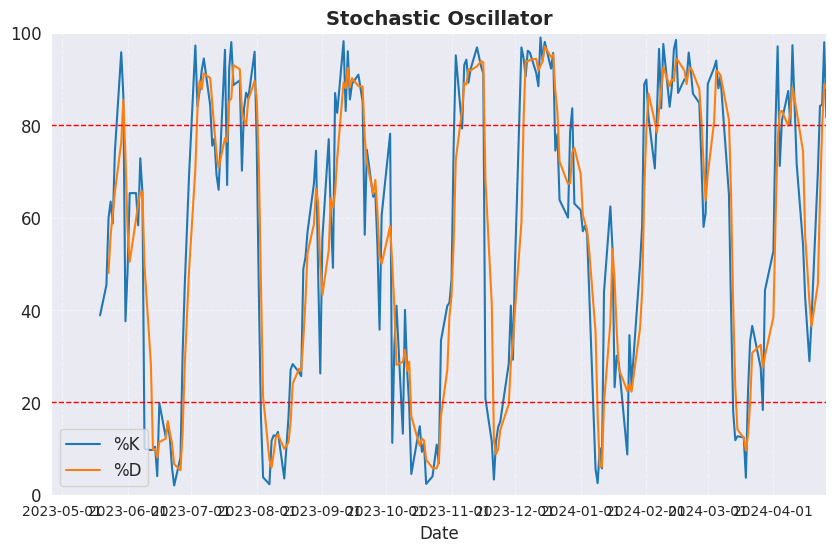

In [58]:
import ta

# Calculate Stochastic Oscillator
so = ta.momentum.StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=3)
df['%K'] = so.stoch()
df['%D'] = so.stoch_signal()

# Set up plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Stochastic Oscillator
ax.plot(df.index, df['%K'], label='%K')
ax.plot(df.index, df['%D'], label='%D')

# Add horizontal lines for overbought and oversold levels
ax.axhline(y=20, color='red', linestyle='--', linewidth=1)
ax.axhline(y=80, color='red', linestyle='--', linewidth=1)

# Add plot title and legend
ax.set_title('Stochastic Oscillator', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=12)

# Format x-axis tick labels as dates
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set x-axis limits to show only the most recent year of data
last_year = df.index[-1] - pd.DateOffset(years=1)
ax.set_xlim(last_year, df.index[-1])

# Set y-axis limits to 0-100 and increase font size of y-axis tick labels
ax.set_ylim(0, 100)
ax.tick_params(axis='y', labelsize=12)

# Add gridlines for both x- and y-axis
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Add label for x-axis
ax.set_xlabel('Date', fontsize=12)

# Show plot
plt.show()

In [59]:
df['ma_20'] = ma_20
df['ma_50'] = ma_50
df['ma_200'] = ma_200
df['rsi'] = rsi
df['macd'] = macd
df['macd_signal'] = signal
df['macd_hist'] = hist
df['bb_upper'] = upper
df['bb_middle'] = middle
df['bb_lower'] = lower

df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '%K', '%D',
       'ma_20', 'ma_50', 'ma_200', 'rsi', 'macd', 'macd_signal', 'macd_hist',
       'bb_upper', 'bb_middle', 'bb_lower'],
      dtype='object')

In [60]:
macd_signal

Date
2023-05-02         NaN
2023-05-03         NaN
2023-05-04         NaN
2023-05-05         NaN
2023-05-08         NaN
                ...   
2024-04-22    6.126915
2024-04-23    5.941656
2024-04-24    5.919316
2024-04-25    6.618564
2024-04-26    7.536468
Length: 244, dtype: float64

In [61]:
macd_hist

Date
2023-05-02         NaN
2023-05-03         NaN
2023-05-04         NaN
2023-05-05         NaN
2023-05-08         NaN
                ...   
2024-04-22   -1.795012
2024-04-23   -0.741034
2024-04-24   -0.089363
2024-04-25    2.796992
2024-04-26    3.671618
Length: 244, dtype: float64